### SQL for Data Analytics

Libraries

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


Connetion to the database

In [6]:
# import the libraries
import sqlite3
import pandas as pd

# create a connection
conn = sqlite3.connect("databases/takeaway.db")

### 1. What is the price distribution of menu items?

In [62]:
price_distribution = """SELECT
            CASE
                WHEN price BETWEEN 1 AND 5 THEN '1-5 EUR'
                WHEN price BETWEEN 6 AND 10 THEN '5-10 EUR'
                WHEN price BETWEEN 11 AND 20 THEN '10-20 EUR'
                WHEN price BETWEEN 20 AND 30 THEN '20-30 EUR'
                WHEN price BETWEEN 30 AND 40 THEN '30-40 EUR'
                WHEN price BETWEEN 40 AND 50 THEN '40-50 EUR'
                
                ELSE '50+ EUR'

            END AS price_range,

        COUNT (*) AS number_of_items,

        CASE
            WHEN price BETWEEN 1 AND 5 THEN 1
            WHEN price BETWEEN 6 AND 10 THEN 2
            WHEN price BETWEEN 11 AND 20 THEN 3
            WHEN price BETWEEN 20 AND 30 THEN 4
            WHEN price BETWEEN 30 AND 40 THEN 5
            WHEN price BETWEEN 40 AND 50 THEN 6

            ELSE 7
        
        END AS order_key


        FROM menuItems
        
        WHERE price >= 1

        GROUP BY price_range
        ORDER BY order_key;
        """ 

df_price_distribution = pd.read_sql_query (price_distribution, conn) 
print(df_price_distribution)

  price_range  number_of_items  order_key
0     1-5 EUR           118804          1
1    5-10 EUR            91197          2
2   10-20 EUR           140158          3
3   20-30 EUR            18073          4
4   30-40 EUR             2167          5
5   40-50 EUR             1041          6
6     50+ EUR            23529          7


#### 1. visualizations

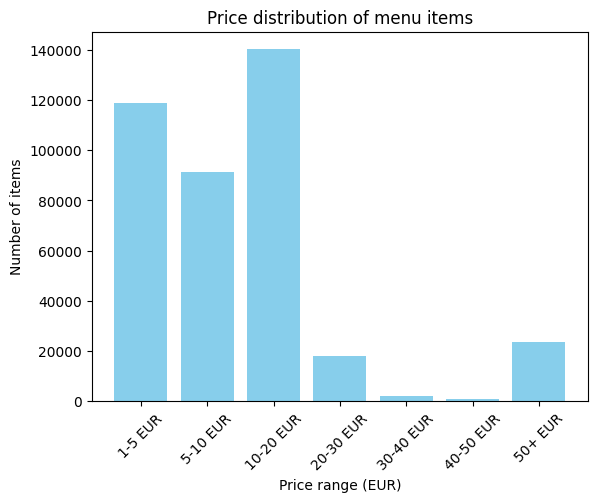

In [ ]:
import matplotlib.pyplot as plt

# Create a simple bar chart
plt.bar(df_price_distribution['price_range'], df_price_distribution['number_of_items'], color='skyblue')

# Add title and axis labels
plt.title("Price distribution of menu items")       # Title of the chart
plt.xlabel("Price range (EUR)")                     # Label for X-axis
plt.ylabel("Number of items")                       # Label for Y-axis


# Rotate X-axis labels to 45 degrees
plt.xticks(rotation=45) # to better view the X-axis values

# Display the chart
plt.show()



### 2. What is the distribution of restaurants per location?


In [63]:
restaurants_distribution = """SELECT city, TRIM(LOWER(city)) AS city_lower,
    COUNT(*) AS num_restaurants,
    CASE
        WHEN COUNT(*) BETWEEN 1 AND 5 THEN 'few'
        WHEN COUNT(*) BETWEEN 6 AND 15 THEN 'some'
        WHEN COUNT(*) BETWEEN 16 AND 30 THEN 'many'
        ELSE 'too much'
    END AS restaurants_per_city
FROM restaurants

WHERE city IS NOT NULL
  AND city <> ''
  AND city NOT LIKE '%0%'
  AND city NOT LIKE '%1%'
  AND city NOT LIKE '%2%'
  AND city NOT LIKE '%3%'
  AND city NOT LIKE '%4%'
  AND city NOT LIKE '%5%'
  AND city NOT LIKE '%6%'
  AND city NOT LIKE '%7%'
  AND city NOT LIKE '%8%'
  AND city NOT LIKE '%9%'

GROUP BY TRIM(LOWER(city));

"""


df_restaurants_distribution = pd.read_sql_query (restaurants_distribution, conn) 
print(df_restaurants_distribution)

            city   city_lower  num_restaurants restaurants_per_city
0          Aalst        aalst               38             too much
1         Aalter       aalter                4                  few
2       Aarschot     aarschot                8                 some
3        Aarsele      aarsele                1                  few
4     Aarstelaar   aarstelaar                1                  few
..           ...          ...              ...                  ...
516        Zulte        zulte                3                  few
517    Zutendaal    zutendaal                1                  few
518     Zwevegem     zwevegem                2                  few
519   Zwijnaarde   zwijnaarde                1                  few
520  Zwijndrecht  zwijndrecht                2                  few

[521 rows x 4 columns]


#### 2. visualizations

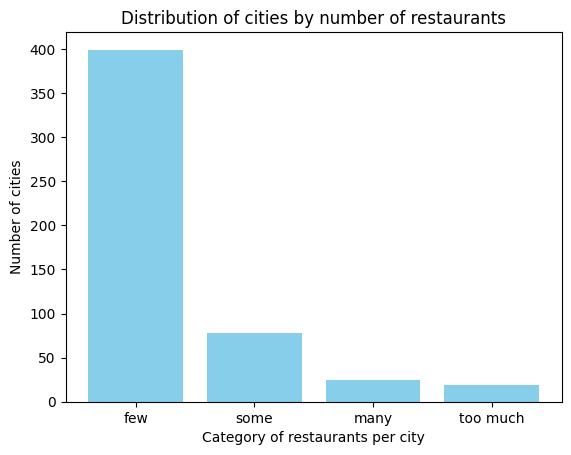

In [78]:
import matplotlib.pyplot as plt

# Count how many cities there are in each category
counts = df_restaurants_distribution['restaurants_per_city'].value_counts()

# Bar chart
plt.bar(counts.index, counts.values, color='skyblue')

# Add title and tags
plt.title("Distribution of cities by number of restaurants")
plt.xlabel("Category of restaurants per city")
plt.ylabel("Number of cities")

# Show chart
plt.show()


### 3. Which are the top 10 pizza restaurants by rating?

In [67]:
top_pizza = """SELECT LOWER(name) AS name, ratings, ratingsNumber
           FROM restaurants
           WHERE ratingsNumber IS NOT NULL AND TRIM(ratingsNumber) <> ''
           
           AND name IS NOT NULL
           AND restaurants.name <> ''

           AND
            ratingsNumber > 300
            AND
            LOWER(name) LIKE '%pizza%'
           ORDER BY ratings DESC
           LIMIT 10
           ;
"""

df_top_pizza  = pd.read_sql_query (top_pizza, conn)
print(df_top_pizza)

                    name  ratings  ratingsNumber
0  kebap - pizza de brug      5.0            312
1           pizza l'esta      4.9            372
2             pizza heat      4.9           1786
3           more pizza's      4.9            311
4           pizza minute      4.9           2833
5               pizzacut      4.9            463
6        pink pizza genk      4.9            688
7     pizza time evergem      4.9           1148
8      l'atelier à pizza      4.8           1558
9              pizza way      4.8            512


#### 3. visualizations

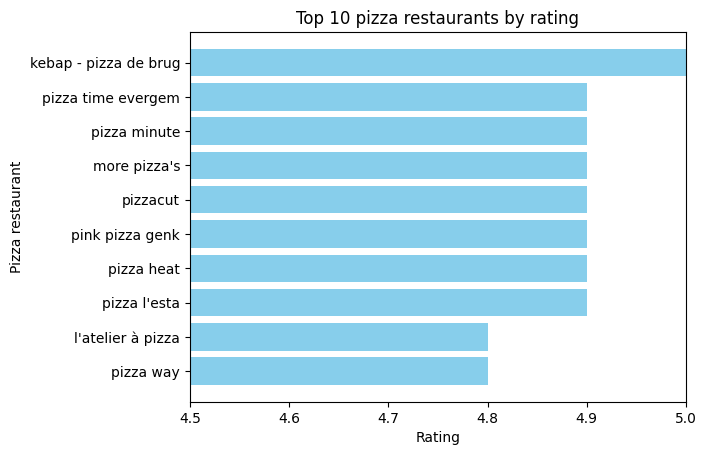

In [81]:
import matplotlib.pyplot as plt

# Sort by rating from highest to lowest
df_top_pizza_sorted = df_top_pizza.sort_values('ratings')

# Horizontal bar chart
plt.barh(df_top_pizza_sorted['name'], df_top_pizza_sorted['ratings'], color='skyblue')

# Add title and tags
plt.xlabel("Rating")
plt.ylabel("Pizza restaurant")
plt.title("Top 10 pizza restaurants by rating")

plt.xlim(4.5, 5.0)  # Ajusta el eje X para resaltar la diferencia
plt.show()


### 4. Map locations offering kapsalons (or your favorite dish) and their average price.

In [65]:
kapsalon = """SELECT LOWER(restaurants.name) AS restaurant_name, LOWER(city) AS city,
       AVG(menuItems.price) AS avg_price

FROM restaurants
JOIN menuItems
  ON restaurants.primarySlug = menuItems.primarySlug

WHERE menuItems.price IS NOT NULL
  AND menuItems.price <> 0
  AND menuItems.price <> ''

  AND restaurants.name IS NOT NULL
  AND restaurants.name <> ''

  AND city IS NOT NULL
  AND city <> ''

  AND menuItems.name LIKE '%kapsalon%'


GROUP BY
  LOWER(restaurants.name),
  LOWER(city);

"""


df_kapsalon = pd.read_sql_query (kapsalon, conn)
print(df_kapsalon)

       restaurant_name                  city  avg_price
0      't food dilemma              wenduine  13.500000
1    't gouden frietje            st-niklaas   7.500000
2           't hoekske             kasterlee  13.583333
3           't hoekske              tongeren   9.800000
4          't kebabske  houthalen-helchteren  12.100000
..                 ...                   ...        ...
862            you you             erpe-mere  10.333333
863          yum smaak          knokke-heist  11.375000
864     zelem pizzeria                 halen  11.000000
865            zem zem          blankenberge   9.333333
866       Öz ahi döner             antwerpen   5.000000

[867 rows x 3 columns]


#### 4. visualizations

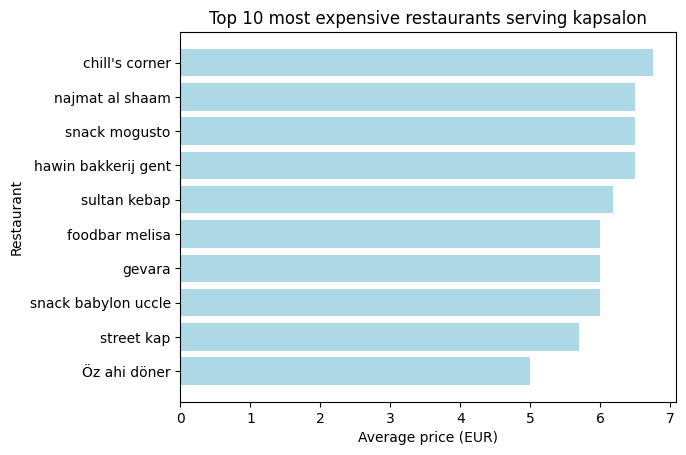

In [84]:
import matplotlib.pyplot as plt

# Top 10 restaurantes más caros
top_kapsalon = df_kapsalon.sort_values('avg_price', ascending=True).head(10)

plt.barh(top_kapsalon['restaurant_name'], top_kapsalon['avg_price'], color='lightblue')
plt.xlabel("Average price (EUR)")
plt.ylabel("Restaurant")
plt.title("Top 10 most expensive restaurants serving kapsalon")
plt.show()


### 5. Which restaurants have the best price-to-rating ratio?

In [85]:
price_ratio = """SELECT LOWER(restaurants.name) AS restaurant_name, LOWER(city) AS city,
       AVG(menuItems.price) AS avg_price,
        AVG(menuItems.price) / restaurants.ratings AS price_to_rating_ratio


FROM restaurants
JOIN menuItems
  ON restaurants.primarySlug = menuItems.primarySlug

WHERE menuItems.price IS NOT NULL
  AND menuItems.price <> 0
  AND menuItems.price <> ''

  AND restaurants.name IS NOT NULL
  AND restaurants.name <> ''

  AND city IS NOT NULL
  AND city <> ''

AND
restaurants.ratingsNumber > 300

GROUP BY restaurants.name, city

ORDER BY price_to_rating_ratio ASC

;

"""


df_price_ratio = pd.read_sql_query (price_ratio, conn)
print(df_price_ratio)

               restaurant_name                 city  avg_price  \
0                el bocadillos            bruxelles   2.000000   
1               frituur amigos              wilrijk   2.411765   
2              la friterie red           anderlecht   2.581081   
3              frituur permeke              wilrijk   2.903279   
4             frituur 't koxke            antwerpen   2.752869   
...                        ...                  ...        ...   
1172             pizza company              beveren  10.229866   
1173  peppino pazzo kampenhout           kampenhout  21.374561   
1174        pizza hut delivery             mechelen  17.344944   
1175           osteria michele               leuven  22.176136   
1176        pizza hut delivery  brugge sint-andries  17.344944   

      price_to_rating_ratio  
0                  0.476190  
1                  0.560876  
2                  0.629532  
3                  0.631148  
4                  0.640202  
...                     ...

#### 5. visualizations

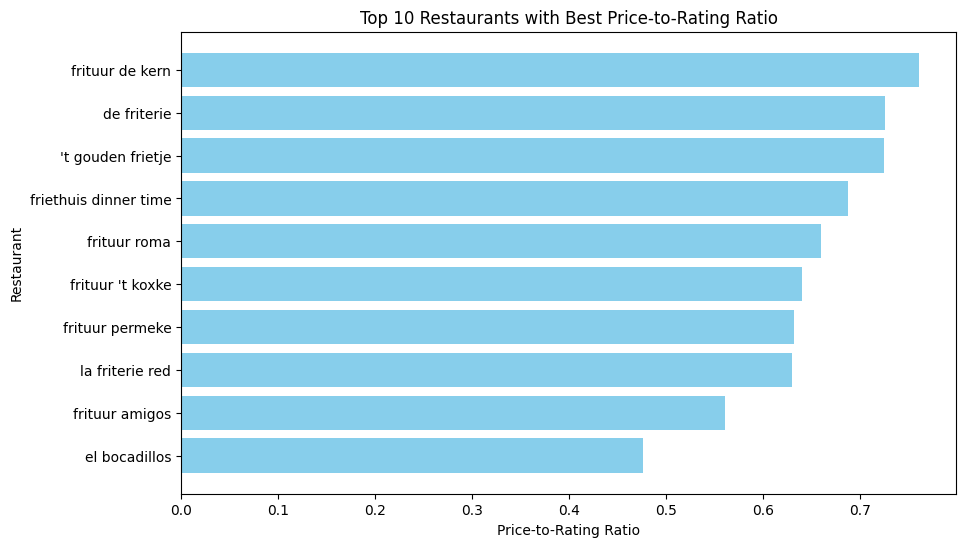

In [89]:
import matplotlib.pyplot as plt

# Sort the DataFrame by price_to_rating_ratio ascending
df_sorted = df_price_ratio.sort_values('price_to_rating_ratio')

# Take only the top 10 restaurants
top_restaurants = df_sorted.head(10)

# Create a simple horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(top_restaurants['restaurant_name'], top_restaurants['price_to_rating_ratio'], color='skyblue')

# Add labels and title
plt.xlabel('Price-to-Rating Ratio')
plt.ylabel('Restaurant')
plt.title('Top 10 Restaurants with Best Price-to-Rating Ratio')

# Show the plot
plt.show()


### 6. Where are the delivery ‘dead zones’—areas with minimal restaurant coverage?

In [104]:
dead_zones = """SELECT locations.ID, locations.postalCode, locations.city,
                COUNT(DISTINCT locations_to_restaurants.restaurant_id) AS num_restaurants,
                locations.latitude, locations.longitude
FROM locations
   LEFT JOIN locations_to_restaurants
      ON locations.ID = locations_to_restaurants.location_id


WHERE locations.ID IS NOT NULL
  AND locations.ID <> ''

  AND locations.postalCode IS NOT NULL
  AND locations.postalCode <> ''
  AND locations.postalCode <> 0

  AND locations.city IS NOT NULL
  AND locations.city <> ''
  AND locations.city <> 0

GROUP BY locations.ID, locations.postalCode, locations.city

HAVING num_restaurants BETWEEN 1 AND 5

ORDER BY num_restaurants ASC
    ;
"""

df_dead_zones = pd.read_sql_query (dead_zones, conn)
print(df_dead_zones)

      ID  postalCode                city  num_restaurants   latitude  \
0    100        9988          Watervliet                1  51.275914   
1    326        8972  Roesbrugge-Haringe                1  50.920006   
2    581        8972              Proven                1  50.890973   
3    842        8978               Watou                1  50.859092   
4   1003        8640        Oostvleteren                1  50.933785   
..   ...         ...                 ...              ...        ...   
74  2253        8600              Woumen                5  51.001304   
75  2264        8600           Diksmuide                5  51.032809   
76  2276        8600           Diksmuide                5  51.034926   
77  2379        8600           Diksmuide                5  51.048857   
78  2390        8600           Diksmuide                5  51.035966   

    longitude  
0    3.627887  
1    2.624774  
2    2.656854  
3    2.664685  
4    2.741783  
..        ...  
74   2.870682  
75   2.

#### 6. visualizations

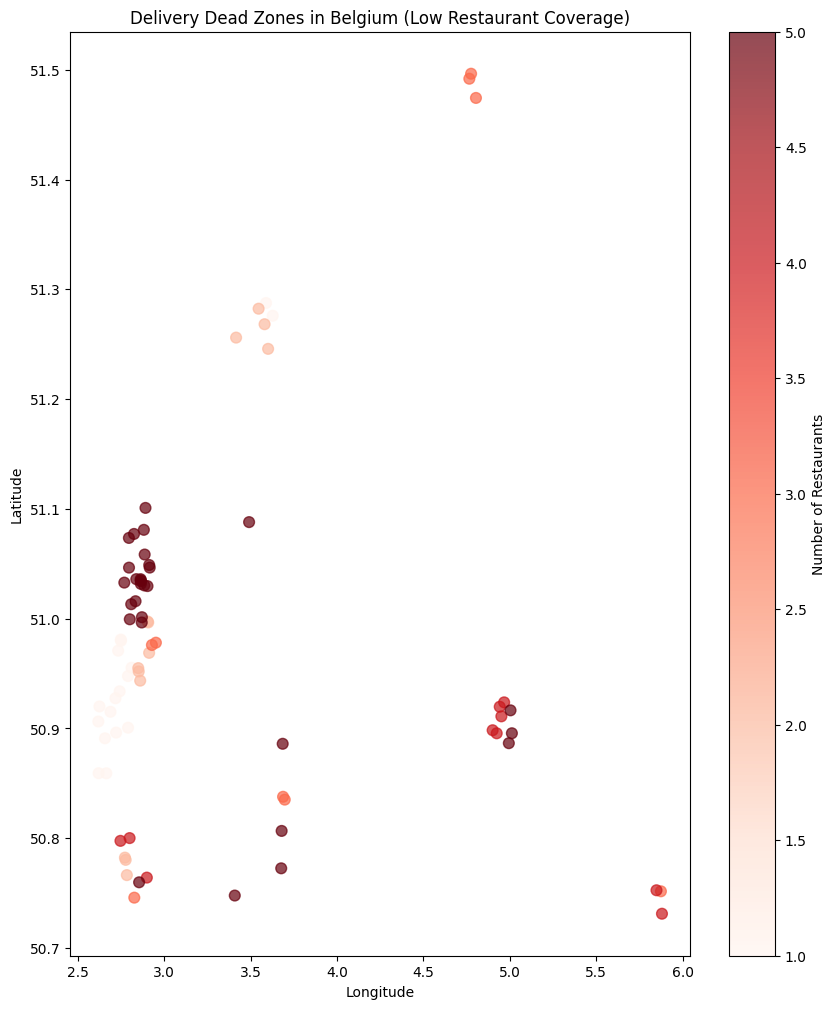

In [107]:
import matplotlib.pyplot as plt

# Create the figure and axis
plt.figure(figsize=(10, 12))

# Scatter plot of dead zones
# Longitude goes on X axis
# Latitude goes on Y axis
plt.scatter(
    df_dead_zones["longitude"],
    df_dead_zones["latitude"],
    s=60,                     # Size of the points
    c=df_dead_zones["num_restaurants"],  # Color based on restaurant count
    cmap="Reds",              # Color map (lighter = fewer restaurants)
    alpha=0.7                 # Transparency
)

# Add a color bar to explain the colors
plt.colorbar(label="Number of Restaurants")

# Add title and labels
plt.title("Delivery Dead Zones in Belgium (Low Restaurant Coverage)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")


# Show the plot
plt.show()


### 8. Identify the World Hummus Order (WHO); top 3 hummus serving restaurants.

In [9]:
hummus = """SELECT LOWER(restaurants.name) AS restaurant_name,
       LOWER(restaurants.city) AS city,
       AVG(menuItems.price) AS avg_price,
       AVG(menuItems.price) / restaurants.ratings AS price_to_rating_ratio


FROM restaurants
JOIN menuItems
  ON restaurants.primarySlug = menuItems.primarySlug

WHERE menuItems.price IS NOT NULL
  AND menuItems.price <> 0
  AND menuItems.price <> ''

  AND restaurants.name IS NOT NULL
  AND restaurants.name <> ''

  AND city IS NOT NULL
  AND city <> ''

  AND menuItems.name LIKE '%hummus%'

  AND
  restaurants.ratingsNumber > 300

GROUP BY restaurants.name, restaurants.city, restaurants.ratings

ORDER BY price_to_rating_ratio DESC

LIMIT 3;

"""



df_hummus = pd.read_sql_query (hummus, conn)
print(df_hummus)

   restaurant_name       city  avg_price  price_to_rating_ratio
0     pita muradim  antwerpen       11.5               2.674419
1  délice du liban      uccle       10.0               2.127660
2             oase       boom        9.0               2.045455


#### 8. visualizations

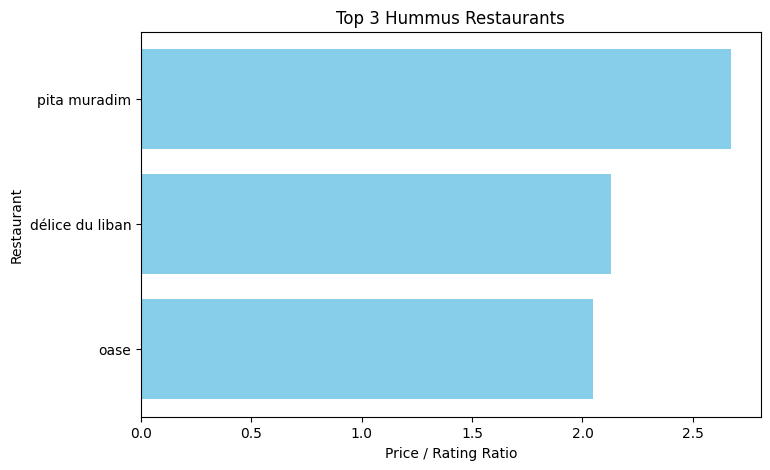

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.barh(df_hummus['restaurant_name'], df_hummus['price_to_rating_ratio'], color='skyblue')

plt.xlabel('Price / Rating Ratio')
plt.ylabel('Restaurant')
plt.title('Top 3 Hummus Restaurants')

plt.gca().invert_yaxis()  # For the top 1 to appear at the top

plt.show()


In [13]:
vegan = """SELECT LOWER(restaurants.name) AS restaurant_name, LOWER(city) AS city,
menuItems.description
       

FROM restaurants
JOIN menuItems
  ON restaurants.primarySlug = menuItems.primarySlug

WHERE menuItems.price IS NOT NULL
  AND menuItems.price <> 0
  AND menuItems.price <> ''

  AND restaurants.name IS NOT NULL
  AND restaurants.name <> ''

  AND city IS NOT NULL
  AND city <> ''

  AND (menuItems.description LIKE '%vegan%' OR menuItems.description LIKE '%vegetarian%')


GROUP BY LOWER(city)


"""




df_vegan = pd.read_sql_query (vegan, conn)
print(df_vegan)

        restaurant_name                  city  \
0                fistro                 aalst   
1        domino's pizza              aarschot   
2                  binx            aartselaar   
3        pizzeria luigi                 alken   
4    pizza hut delivery                 alost   
..                  ...                   ...   
134      domino's pizza  woluwe-saint-lambert   
135      domino's pizza              zaventem   
136              yamiii                 zemst   
137      domino's pizza              zonhoven   
138      domino's pizza              zottegem   

                                           description  
0                          'Vegan goulash met seitan.'  
1               'Sauce tomate, fromage vegan, origan.'  
2                          '4 stuks vlammetjes vegan.'  
3                                        'Vegetarian.'  
4    'Boulettes de falafel, coulis de basilic, toma...  
..                                                 ...  
134         